In [41]:
#Importing libraries

import cv2
from PIL import Image
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from subprocess import check_output
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [42]:
#Base input image data and setting directory paths

img_height = 50
img_width = 50
channels = 3
image_shape = (img_height, img_width, channels)

# Resizing the images to 50x50x3, being RGB meaning 3 channels
IMG_HEIGHT = 50
IMG_WIDTH = 50
channels = 3
image_shape = (IMG_HEIGHT, IMG_WIDTH, channels)

In [43]:
#Number of cathegories for one-hot encoding

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [44]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

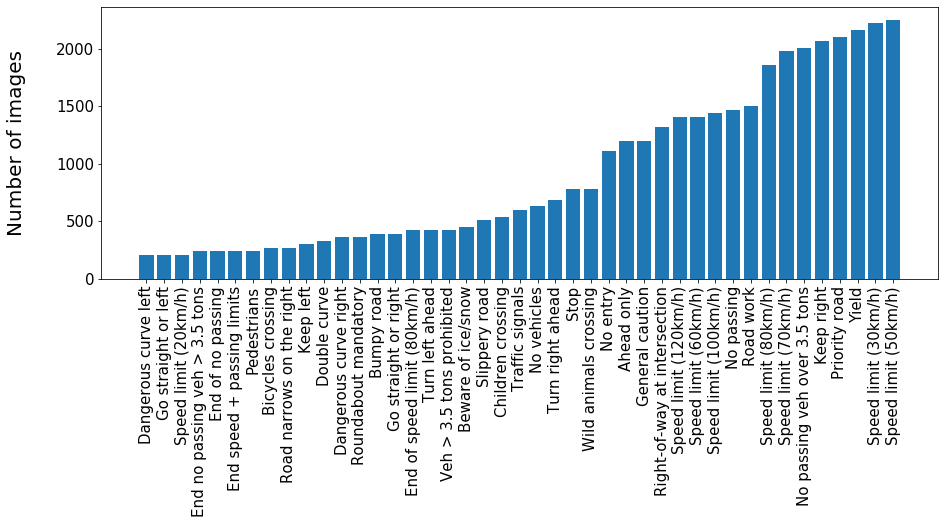

In [41]:
#Visualising the data

folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(15,5))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.ylabel("Number of images", labelpad = 30 ,size=20)
#plt.savefig('img.png', bbox_inches = 'tight')
plt.show()

In [45]:
# Collecting the training data
image_data = []
image_labels = []

roundaboutimagepath = ".//training images"
totalroundaboutimages = 360 # 10%
reallifeimages = 90

for i in range(NUM_CATEGORIES):
    path = data_dir + '//train//' + str(i)
    images = os.listdir(path)
    
    if (i == 40):
        imagecount = 0
        print(f"Real life images start loading : {imagecount}")
        
        for img in os.listdir(roundaboutimagepath):
            imagecount = imagecount + 1
            try:
                my_image = image.load_img(roundaboutimagepath + '/' + img, target_size=image_shape)
                my_image = image.img_to_array(my_image)
                my_image = my_image / 255
                #imgplot = plt.imshow(my_image) # Showing the image
                #plt.show()
                image_data.append(my_image)
                image_labels.append(i)
            except:
                print("Error in " + img)
            
            if (imagecount == reallifeimages):
                break
                
        print(f"Real life images stopped loading : {imagecount}")    
                
        for img in images:
            imagecount = imagecount + 1
            try:
                my_image = image.load_img(path + '/' + img, target_size=image_shape)
                my_image = image.img_to_array(my_image)
                my_image = my_image / 255
                image_data.append(my_image)
                image_labels.append(i)
            except:
                print("Error in " + img)
            
            if (imagecount == totalroundaboutimages):
                break
        
        print(f"Finished all roundabout images loading : {imagecount}")
                
    else:
        for img in images:
            try:
                my_image = image.load_img(path + '/' + img, target_size=image_shape)
                my_image = image.img_to_array(my_image)
                my_image = my_image / 255
                image_data.append(my_image)
                image_labels.append(i)

            except:
                print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

Real life images start loading : 0
Real life images stopped loading : 90
Finished all roundabout images loading : 360
(39209, 50, 50, 3) (39209,)


In [46]:
# Randomly shuffling the training data to avoid bias

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [47]:
#Splitting data into validation and training sets

#X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

#X_train = X_train/255 
#X_val = X_val/255
X_train = image_data
y_train = image_labels

print("X_train.shape", X_train.shape)
#print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
#print("y_valid.shape", y_val.shape)

X_train.shape (39209, 50, 50, 3)
y_train.shape (39209,)


In [48]:
#One-hot encoding the labels

y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
#y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
#print(y_val.shape)

(39209, 43)


In [49]:
#Creating the model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))  

In [50]:
#Compiling the model

lr = 0.001
epochs = 10

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [51]:
#Augementing the model

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

#early_stop = EarlyStopping(monitor='val_loss',patience=2)

#history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs,
#                    validation_data=(X_val, y_val), callbacks=[early_stop])

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs)

Epoch 1/10
1226/1226 [==============================] - 146s 119ms/step - loss: 1.6262 - accuracy: 0.5994
Epoch 2/10
1226/1226 [==============================] - 150s 122ms/step - loss: 0.0943 - accuracy: 0.9721
Epoch 3/10
1226/1226 [==============================] - 154s 125ms/step - loss: 0.0562 - accuracy: 0.9834
Epoch 4/10
1226/1226 [==============================] - 156s 127ms/step - loss: 0.0389 - accuracy: 0.9893
Epoch 5/10
1226/1226 [==============================] - 157s 128ms/step - loss: 0.0305 - accuracy: 0.9913
Epoch 6/10
1226/1226 [==============================] - 161s 131ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 7/10
1226/1226 [==============================] - 159s 130ms/step - loss: 0.0197 - accuracy: 0.9943
Epoch 8/10
1226/1226 [==============================] - 159s 130ms/step - loss: 0.0134 - accuracy: 0.9959
Epoch 9/10
1226/1226 [==============================] - 160s 130ms/step - loss: 0.0131 - accuracy: 0.9968
Epoch 10/10
1226/1226 [=======================

In [52]:
#Saving the model

model.save('classifier_25percent.h5')

In [53]:
#Saving history of the model as a dictionary

history_dict = history.history

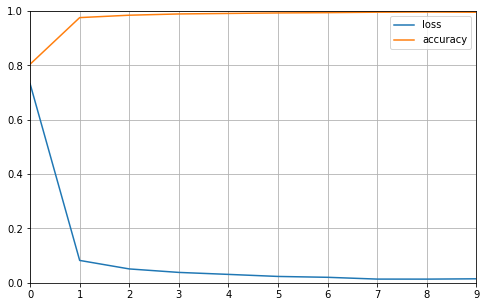

In [16]:
#Plotting loss and validation loss against epochs

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth=2.0, marker= '+', markersize = 10)
plt.setp(line2, linewidth=2.0, marker= '4', markersize = 10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

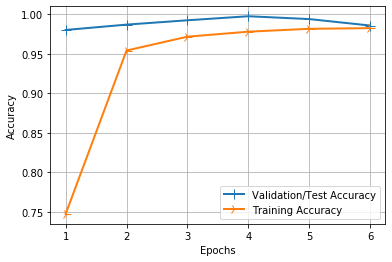

In [17]:
#Plotting acc and validation acc against epochs

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = "Validation/Test Accuracy")
line2 = plt.plot(epochs, acc_values, label = "Training Accuracy")
plt.setp(line1, linewidth=2.0, marker= '+', markersize = 10)
plt.setp(line2, linewidth=2.0, marker= '4', markersize = 10)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()